In [1]:
import os
from tensorflow import keras
import librosa
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("/home/safat/python_code/audio")
csv_file_name = 'UrbanSound8K/metadata/'
csv_file_path = os.path.join(os.getcwd(), csv_file_name)
print(csv_file_path)

/home/safat/python_code/audio/UrbanSound8K/metadata/


In [3]:
os.chdir(csv_file_path)
os.listdir()

['.DS_Store', 'UrbanSound8K.csv']

<h3>In the CSV Folder </h3>

In [4]:
df = pd.read_csv('UrbanSound8K.csv')
df.head(3)


,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing


In [5]:
print(df.class_name.value_counts())

engine_idling       1000
street_music        1000
jackhammer          1000
air_conditioner     1000
children_playing    1000
drilling            1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


In [6]:
pwd

'/home/safat/python_code/audio/UrbanSound8K/metadata'

In [9]:
os.chdir("../audio")
os.getcwd()
os.listdir()

['.DS_Store',
 'fold2',
 'fold10',
 'fold1',
 'fold7',
 'fold4',
 'fold3',
 'fold6',
 'fold9',
 'fold5',
 'fold8']

<h3> Enter in the Frst Folder </h3>

In [10]:
frst_audio_folder = os.chdir('/home/safat/python_code/audio/UrbanSound8K/audio/fold1')
os.getcwd()

'/home/safat/python_code/audio/UrbanSound8K/audio/fold1'

In [11]:
import glob
x = len(glob.glob("*.wav"))
print(x)

873


In [12]:
os.listdir()[0]

'143651-2-0-39.wav'

In [13]:
import IPython.display as ipd
import librosa.display
ipd.Audio(os.listdir()[3])
#wave_file = open(os.listdir()[3],"rb")
#riff = wave_file.read(36)
#print(riff)

## We want to convert the Sound to Numpy Array

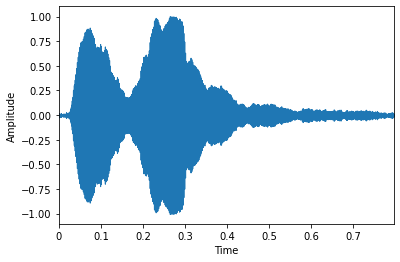

In [14]:
signal, sr = librosa.load(os.listdir()[3], sr = 22050)
librosa.display.waveplot(signal, sr=sr)
plt.ylabel('Amplitude')
plt.show()

In [15]:
ps = librosa.feature.melspectrogram(y=signal,sr =sr)

In [16]:
ps.shape

(128, 35)

/home/safat/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/safat/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


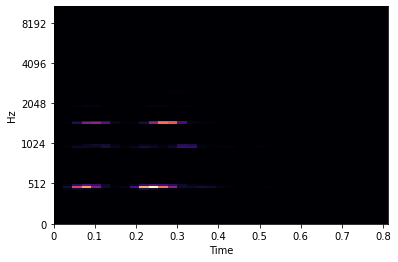

In [17]:
librosa.display.specshow(ps,y_axis='mel', x_axis='time')

## A new issue solved for finding the information of the wav file 

In [18]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [19]:
wavfilehelper = WavFileHelper()
audiodata = []

for index, row in df.iterrows():
    file_name = os.path.join(os.path.abspath('/home/safat/python_code/audio/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [20]:
#audiodf
#print(audiodf.num_chanaudionels.value_counts(normalize = True))
#print(audiodf.sample_rate.value_counts())
print(audiodf.bit_depth.value_counts(normalize=True))

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64


## Data pre-processing

In [21]:
def extract_features(file_name):

    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 

    return mfccsscaled

In [ ]:

# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/home/safat/python_code/audio/UrbanSound8K/audio/'

metadata = pd.read_csv(fulldatasetpath + '../metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():

    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))

    class_label = row["class_name"]
     data= extract_features(file_name)

    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

## Load the env

In [1]:
import dill
dill.load_session('../../notebook_env.db')


/home/safat/.local/lib/python3.8/site-packages/dill/_dill.py:481: UserWarning: This figure was saved with matplotlib version 3.3.2 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


In [2]:
featuresdf.to_hdf('/../../features_from_UrbanSound.h5', key='df',mode='w')
os.listdir()

Opening /../../features_from_UrbanSound.h5 in read-only mode


OSError: ``/../../features_from_UrbanSound.h5`` does not exist

In [2]:
ls

adding_new_feature/
audio_with_cnn_whole.ipynb
audio_with_notebook_1.ipynb
cnn_model_after_training2.h5
cnn_model_training_with_mfcc_again.py
cnn_sound-class_classification.py
combined_for_detection.py
feature_extraction_for_audio_cnn.py
feature_extraction_for_mel.ipynb
features_from_UrbanSound_for_cnn_for_only_mel.h5
features_from_UrbanSound_for_cnn_for_only_tonnetz.h5
Figure_1.png
-home-safat-python_code-emergency_vehicle_detection-vgg_16_approach-.txt
mfcc_cnn2_50_epoch.png
mfcc_cnn_plot.png
mfcc_training_history_cnn
mlp_history_100epoch.png
mlp_history.png
prediction_audio_with_cnn_based_trained_model.py
__pycache__/
sound_classifier_01.py
temp.wav
Untitled1.ipynb
Untitled.ipynb


In [6]:
os.getcwd()

'/home/safat/python_code/audio/audio_processing/codes for UrbanSound8K dataset project'

In [2]:
featuredf = pd.read_hdf('../../features_from_UrbanSound.h5','df')

In [3]:
featuresdf.head()

,feature,class_label
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [4]:
print(featuresdf.shape)
print(featuresdf.feature.shape)

(8732, 2)
(8732,)


## Convert the data and labels for understable numerical data

In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical  

In [5]:
inputs = np.array(featuresdf.feature.tolist())
#inputs = np.array(featuresdf[-1].tolist())
targets = np.array(featuresdf.class_label.tolist())
le = LabelEncoder()
targets = to_categorical(le.fit_transform(targets))

In [6]:
print(inputs.shape)
print(inputs[0].shape)
print(inputs[100].shape)
print(inputs[0][39])

(8732, 40)
(40,)
(40,)
0.35438862


In [7]:
print(len(targets))

8732


## Split the dataset

In [8]:
#split the dataset 
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets, test_size = 0.2)

In [9]:
print(inputs[0].shape)
print(inputs_train.shape)

(40,)
(6985, 40)



## Applying MLP first 

<h5> Build the network </h5>

In [21]:
#build the network
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape=(40,)))
model.add(keras.layers.Dense(512,input_shape=(40,),activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
# model.add(keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(16, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
# model.add(keras.layers.Dense(32, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(10, activation="softmax"))

<h5> Compile the network </h5>

In [22]:
#compile network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy"
             ,metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               20992     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                4112      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 156,602
Trainable params: 156,602
Non-trainable params: 0
_________________________________________________________________


<h5>train network </h5>

In [24]:
#train network
history = model.fit(inputs_train,targets_train,validation_data=(
            inputs_test,targets_test),epochs=25,
            batch_size = 32)

Epoch 1/25
219/219 [==============================] - 1s 4ms/step - loss: 4.4858 - accuracy: 0.1934 - val_loss: 2.2195 - val_accuracy: 0.3795
Epoch 2/25
219/219 [==============================] - 1s 3ms/step - loss: 2.1026 - accuracy: 0.4032 - val_loss: 2.0428 - val_accuracy: 0.4556
Epoch 3/25
219/219 [==============================] - 1s 3ms/step - loss: 1.8239 - accuracy: 0.5186 - val_loss: 1.8366 - val_accuracy: 0.5243
Epoch 4/25
219/219 [==============================] - 1s 3ms/step - loss: 1.6911 - accuracy: 0.5583 - val_loss: 1.6870 - val_accuracy: 0.5781
Epoch 5/25
219/219 [==============================] - 1s 3ms/step - loss: 1.6023 - accuracy: 0.5924 - val_loss: 1.6208 - val_accuracy: 0.5856
Epoch 6/25
219/219 [==============================] - 1s 3ms/step - loss: 1.5094 - accuracy: 0.6205 - val_loss: 1.6012 - val_accuracy: 0.5924
Epoch 7/25
219/219 [==============================] - 1s 3ms/step - loss: 1.4724 - accuracy: 0.6334 - val_loss: 1.4777 - val_accuracy: 0.6251
Epoch 

## Plot History

In [29]:
def plot_history(history):
    
    plt.style.use('ggplot')
    fig, axs = plt.subplots(1, figsize=(10.24,7.2))
    #create accuracy subplots
    axs.plot(history.history["accuracy"], label="train accuracy")
    axs.plot(history.history["val_accuracy"], label="test accuracy")
    axs.set_ylabel("Accuracy")
    axs.legend(loc="lower right")
#     axs.set_title("Accuracy eval(MLP)")
    axs.set_title("Class Label Accuracy")
    
    #create error subplots
#     axs[1].plot(history.history["loss"], label="train error")
#     axs[1].plot(history.history["val_loss"], label="test error")
#     axs[1].set_ylabel("Error")
#     axs[1].set_xlabel("Epoch")
#     axs[1].legend(loc="upper right")
# #     axs[1].set_title("Bounding Box Regression Loss on Training Set")
#     axs[1].set_title("Loss eval(MLP)")
#     fig.savefig('mlp_history_100epoch.png')

    plt.show()

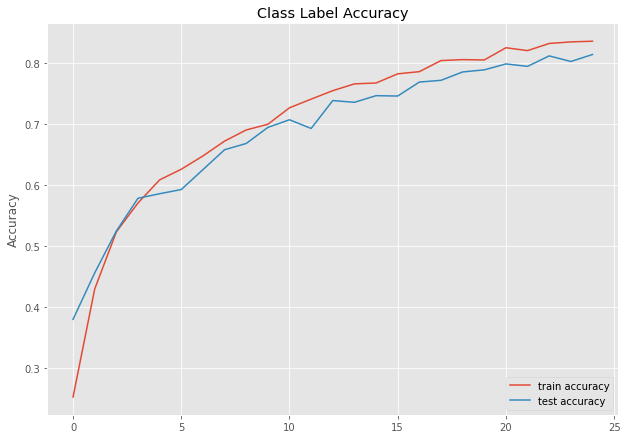

In [30]:
plot_history(history)

In [31]:
score = model.evaluate(inputs_train, targets_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(inputs_test, targets_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.839656412601471
Testing Accuracy:  0.8139668107032776


In [15]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None

    return np.array([mfccsscaled])

In [28]:
filename = '/home/safat/python_code/audio/downloaded_audio_clips/bee.wav' 
f = extract_feature(filename)
print(f)

/home/safat/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[[-3.3565039e+02  8.7420853e+01  4.3346680e+01  3.5025150e+01
   3.9106023e-01  2.1790783e+01 -4.8324051e+00  1.4480300e+01
  -6.6543584e+00  9.2843437e+00 -6.9256701e+00  5.8847733e+00
  -7.3967228e+00  6.1415806e+00 -7.3253880e+00  4.8752480e+00
  -6.6478696e+00  2.7735682e+00 -5.9172530e+00  1.2919326e-01
  -7.5664949e+00 -8.9361650e-01 -4.8579993e+00  1.9435608e+00
  -2.9179609e+00  3.8446209e-01 -3.5852911e+00  6.1317170e-01
  -1.5251101e+00  7.9645079e-01 -2.4427533e+00 -2.5609281e+00
  -5.3411183e+00 -3.1516495e+00 -3.5545182e+00 -2.1140358e+00
  -2.5030577e+00 -2.8837461e+00 -3.2579505e+00 -2.9326270e+00]]


In [24]:
print(type(f),f.shape)

<class 'numpy.ndarray'> (1, 40)


## Predictions

In [20]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [29]:
filename = '/home/safat/python_code/audio/downloaded_audio_clips/bee.wav' 
print_prediction(filename)

/home/safat/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


The predicted class is: dog_bark 

air_conditioner 		 :  0.00066651107044890522956848144531
car_horn 		 :  0.00564245833083987236022949218750
children_playing 		 :  0.00183365051634609699249267578125
dog_bark 		 :  0.81760102510452270507812500000000
drilling 		 :  0.12485200911760330200195312500000
engine_idling 		 :  0.00690994225442409515380859375000
gun_shot 		 :  0.00010309789649909362196922302246
jackhammer 		 :  0.00055633299052715301513671875000
siren 		 :  0.00248061306774616241455078125000
street_music 		 :  0.03935433179140090942382812500000


/home/safat/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/safat/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
yhat_probs = model.predict(inputs_test, verbose=0)
yhat_classes = model.predict_classes(inputs_test, verbose=0)
# print(yhat_probs)
# print(len(yhat_classes))
# print(inputs_test.shape)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]
matrix = confusion_matrix(targets_test, yhat_classes)
# print(matrix)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

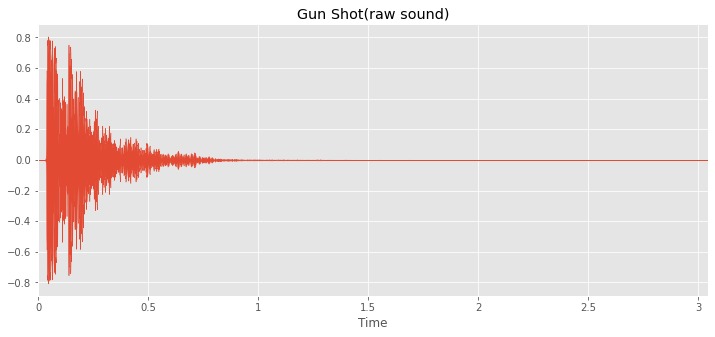

In [37]:
plt.style.use('ggplot')
y, sr = librosa.load('/home/safat/python_code/audio/gunshot.wav')
plt.figure(figsize=(12,5))
librosa.display.waveplot(y,sr);
plt.title('Gun Shot(raw sound)')
ipd.Audio(data=y, rate=sr)

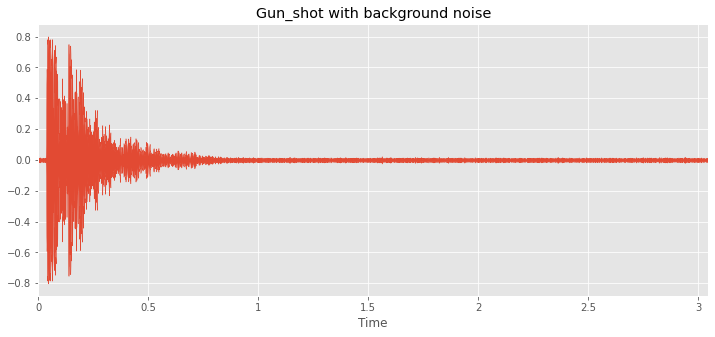

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
noise = np.random.randn(len(y))
data_noise = y + 0.005 * noise
librosa.display.waveplot(data_noise,sr);
plt.title('Gun_shot with background noise')
ipd.Audio(data=data_noise, rate=sr)

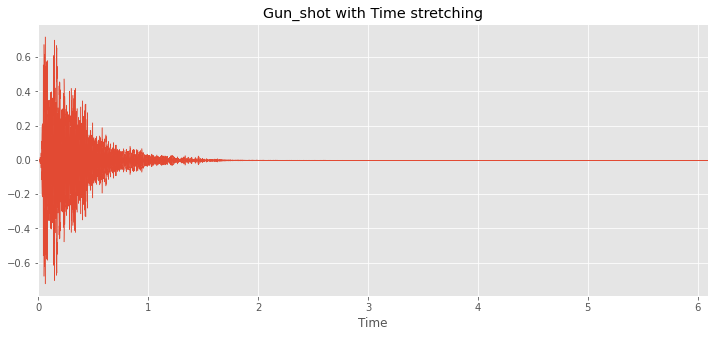

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
y_fast = librosa.effects.time_stretch(y, 0.5)
librosa.display.waveplot(y_fast,sr);
plt.title('Gun_shot with Time stretching')
ipd.Audio(data=y_fast, rate=sr)

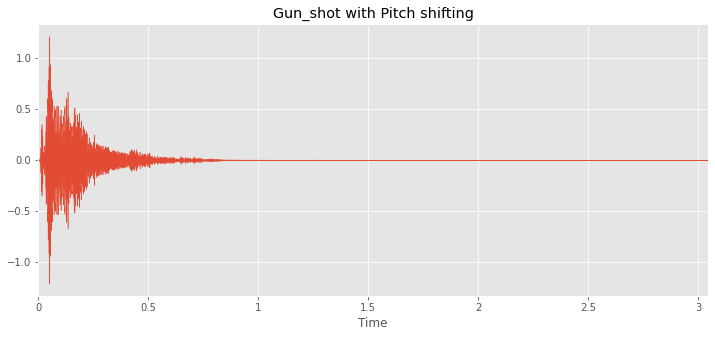

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
y_third = librosa.effects.pitch_shift(y, sr, n_steps=20)
librosa.display.waveplot(y_third,sr)
plt.title('Gun_shot with Pitch shifting')
ipd.Audio(data=y_third, rate=sr)

# MLP with Mel 

In [55]:
def extract_features_mel(file_name):

    try:
        audio, sr = librosa.load(file_name, res_type = 'kaiser_fast')
        mel = librosa.feature.melspectrogram(y=audio, sr=sr)
        mfccsscaled = np.mean(mel.T,axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 

    return mfccsscaled

In [56]:
result = extract_features_mel('/home/safat/python_code/audio/gunshot.wav')